<a href="https://colab.research.google.com/github/VaishnaviBairagoni/AIML-Lab/blob/main/Asssignment-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smooth

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


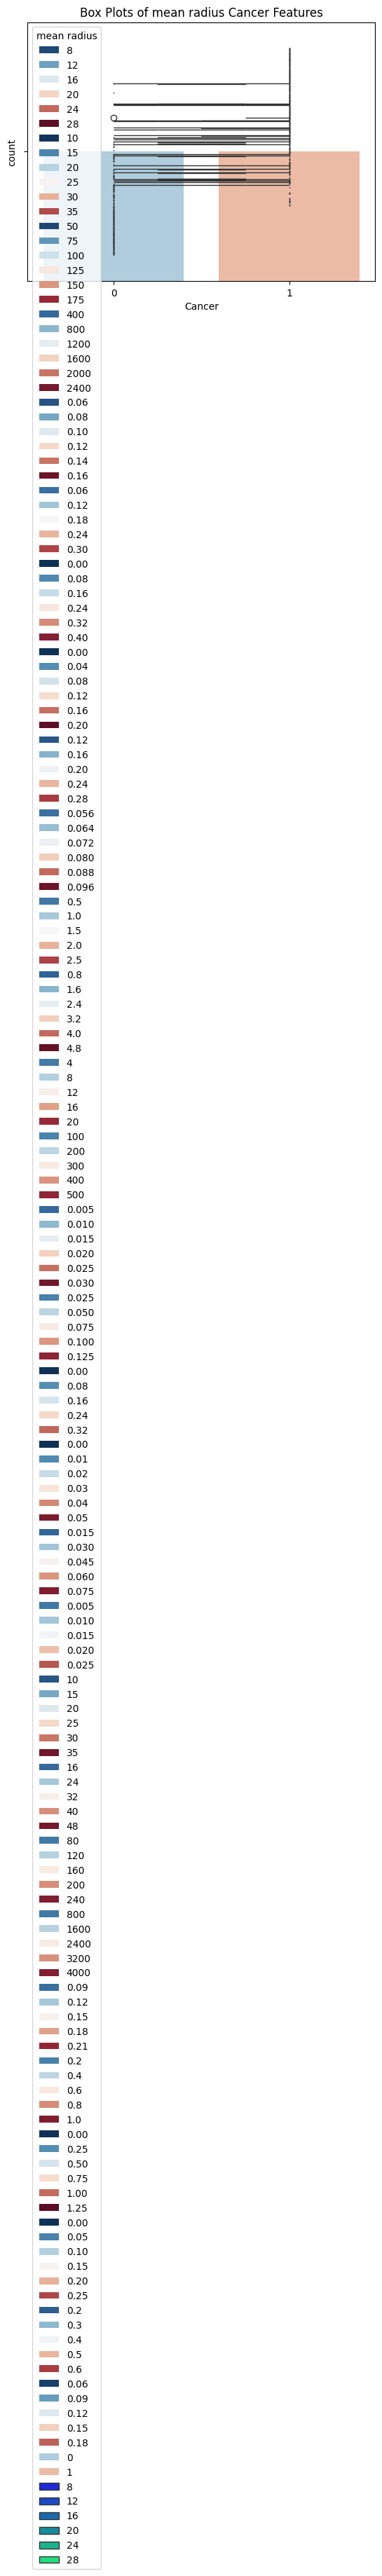

<Figure size 640x480 with 0 Axes>

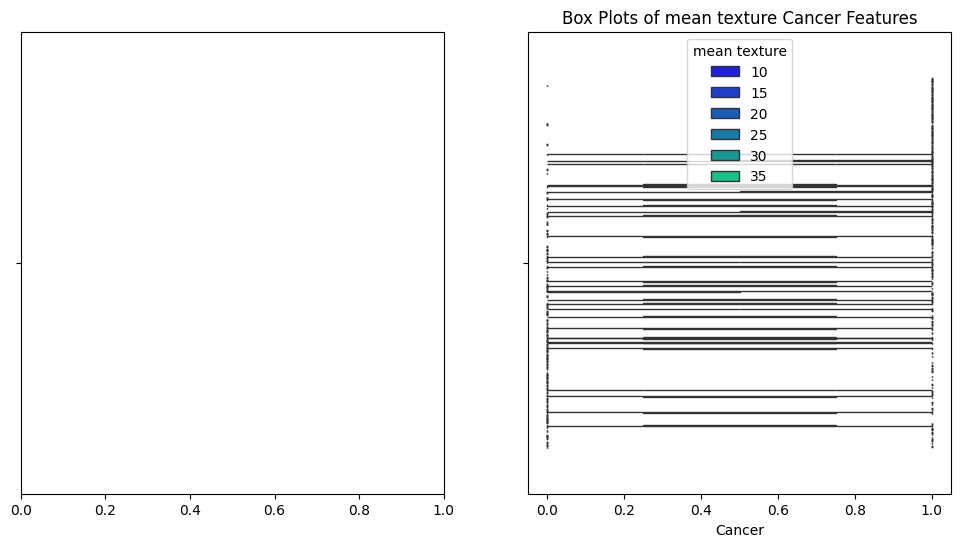

<Figure size 640x480 with 0 Axes>

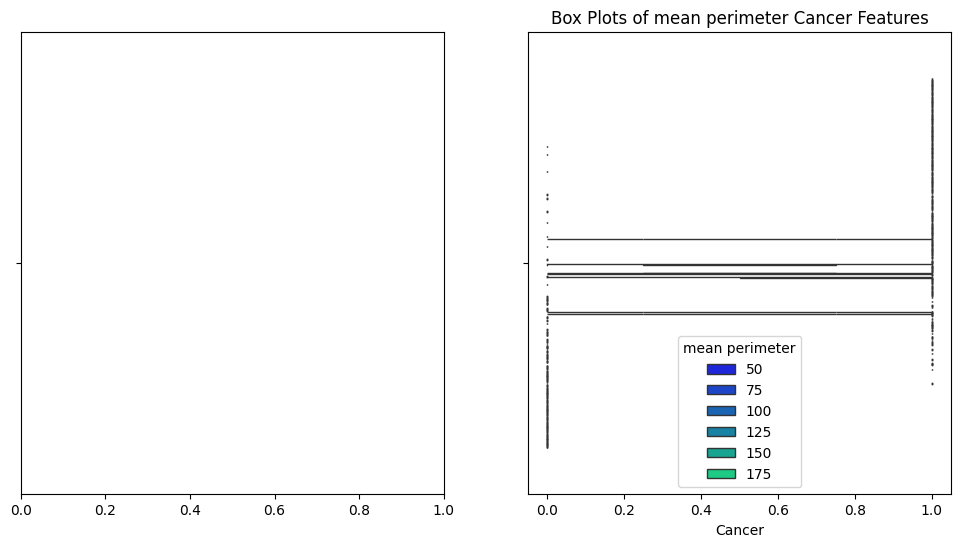

<Figure size 640x480 with 0 Axes>

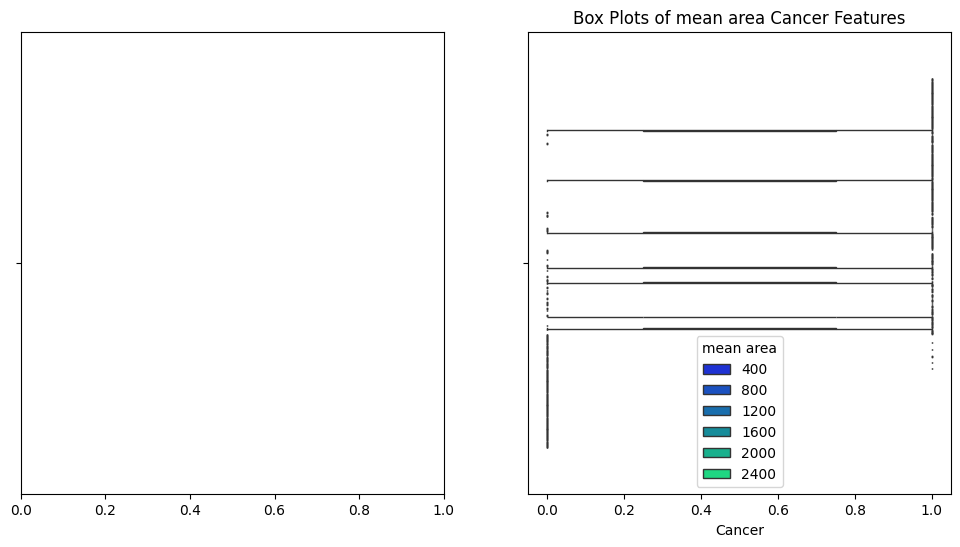

<Figure size 640x480 with 0 Axes>

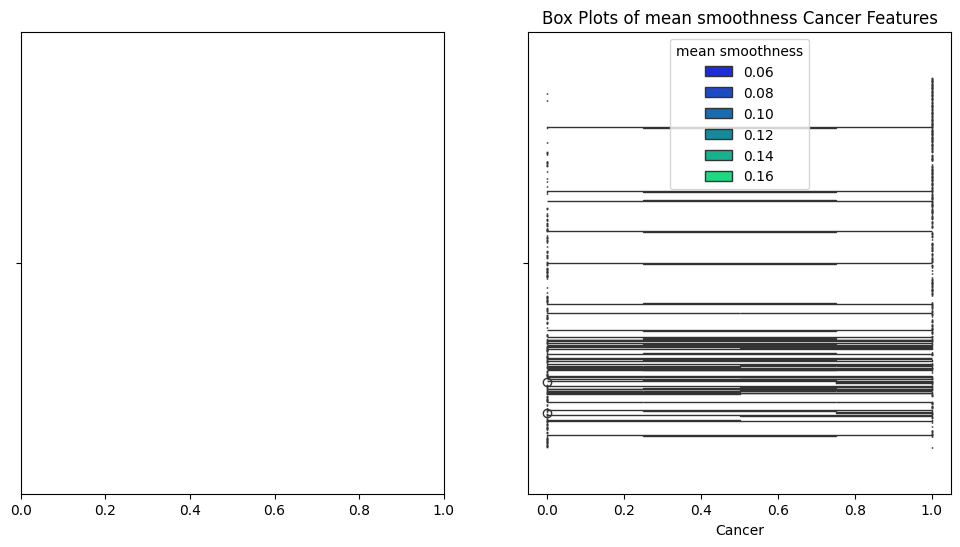

<Figure size 640x480 with 0 Axes>

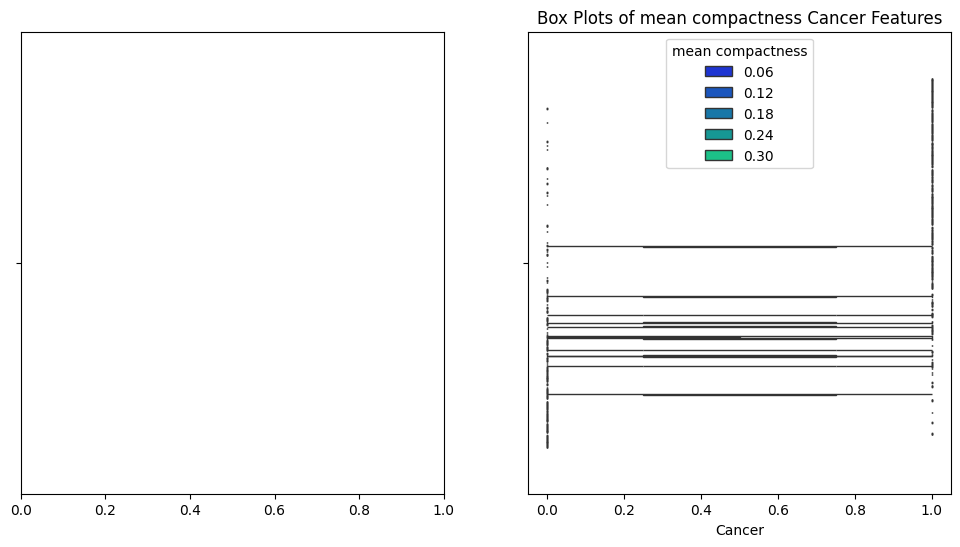

<Figure size 640x480 with 0 Axes>

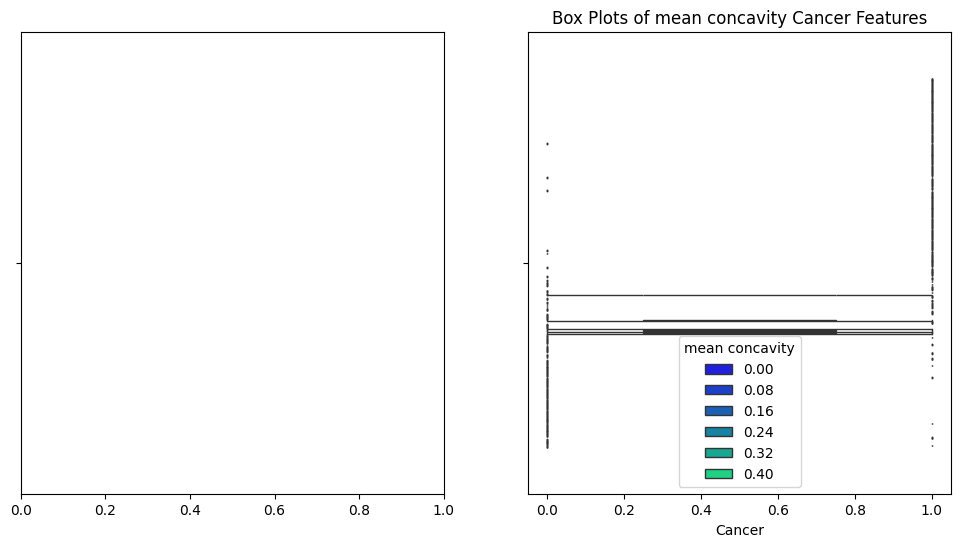

<Figure size 640x480 with 0 Axes>

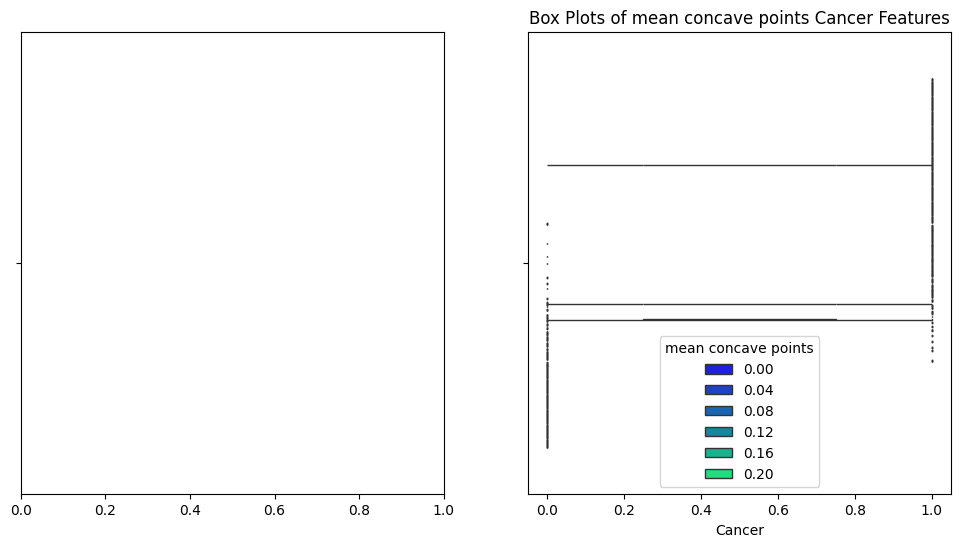

<Figure size 640x480 with 0 Axes>

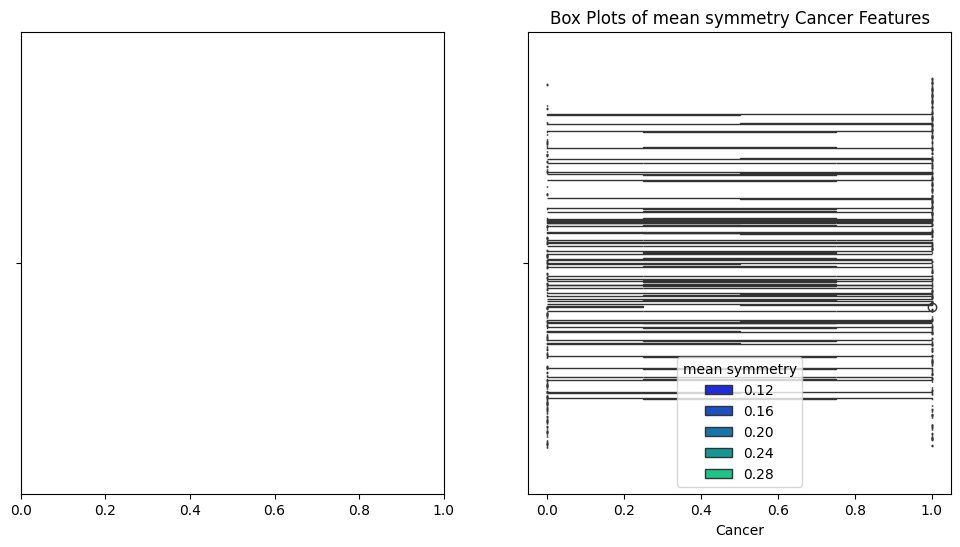

<Figure size 640x480 with 0 Axes>

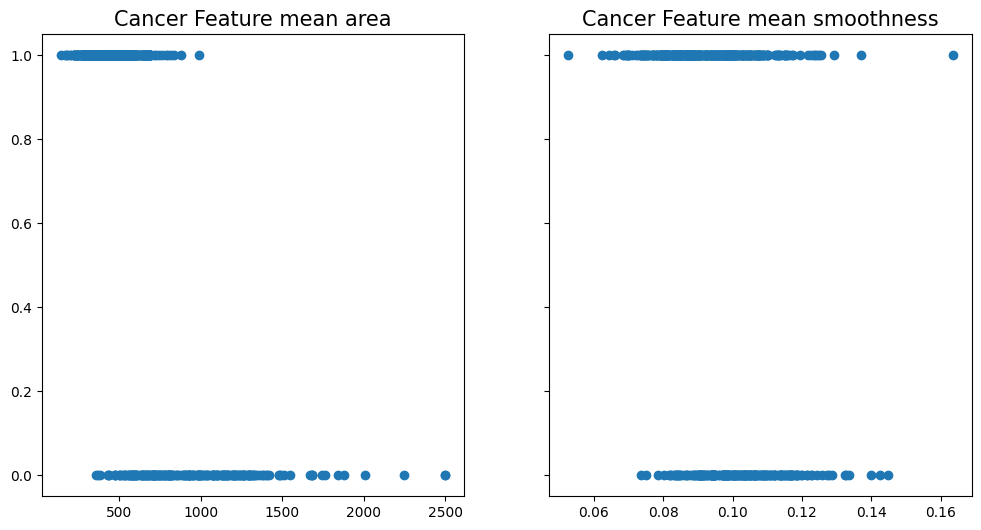

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()
print(cancer['feature_names'])
cancer['feature_names']
df = pd.DataFrame(cancer['data'],
                  columns=cancer['feature_names'])
df.info()
df.columns
df.describe()
# Sum of the count of null objects in all
# columns of data frame
np.sum(pd.isnull(df).sum())
cancer['target'].shape ## where 1- Benign, 0-Malignent
df['Cancer'] = pd.DataFrame(cancer['target'])
df.head()
l =len(df.columns)
l
l =len(df.columns)
l =len(df.columns)
for i in range(l):
  #sns.set_style('whitegrid')
  sns.countplot(x='Cancer',hue=df.columns[i],data=df,
              palette='RdBu_r',)
l=list(df.columns[0:10])
for i in range(len(l)-1):
    sns.boxplot(x='Cancer',hue=l[i], data=df,
                palette='winter')
    plt.title(f"Box Plots of {l[i]} Cancer Features")
    plt.figure()
    f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.scatter(df['mean area'],df['Cancer'])
ax1.set_title("Cancer Feature mean area", fontsize=15)
ax2.scatter(df['mean smoothness'],df['Cancer'])
ax2.set_title("Cancer Feature mean smoothness",fontsize=15)
# Define a dataframe with only features
df_feat = df.drop('Cancer',axis=1)
#df_feat.head()
df_feat.shape
# Define a dataframe with only target results for
# cancer detection
df_target = df['Cancer']
#df_target.head()
df_target.shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(df_feat, df_target,test_size=0.20,random_state=101)
df_feat.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(confusion_matrix(y_test,predictions))
accuracy_score(y_test, predictions)
print(classification_report(y_test,predictions))
print("Test Data Misclassification error rate:",
      round(np.mean(predictions!=y_test),3))

train_pred = model.predict(X_train)
print("Train Data Misclassification error rate:",
      round(np.mean(train_pred!=y_train),3))
print(f"Accuracy of train data:{accuracy_score(y_train, train_pred)}")
print(f"Accuracy of test data:{accuracy_score(y_test, predictions)}")
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
# May take awhile!
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
param_grid = {'C': [50,75,100,125,150], 'gamma': [1e-2,1e-3,1e-4,1e-5,1e-6], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(tol=1e-5),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)
grid.best_estimator_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))